# Link prediction for NetworKit

In [1]:
from networkit import *
%matplotlib inline
import matplotlib.pyplot as plt
import time

No module named 'seaborn'


In [2]:
cd ~/Thesis/NetworKit-Esders

/home/xza/Thesis/NetworKit-Esders


In [3]:
G = readGraph("input/hep-th.graph", Format.METIS)

In [4]:
partitionedGraph = linkprediction.RandomEdgePartitioner(G).partitionByPercentage(0.3)
G.numberOfEdges()

15751

In [5]:
partitionedGraph[0].numberOfEdges()

11026

In [6]:
partitionedGraph[1].numberOfEdges()

4725

In [7]:
katzIndex = linkprediction.KatzIndex(partitionedGraph[0], 10, 0.05)
commonNeighborsIndex = linkprediction.CommonNeighborsIndex(partitionedGraph[0])
jaccardIndex = linkprediction.JaccardIndex(partitionedGraph[0])
preferentialAttachmentIndex = linkprediction.PreferentialAttachmentIndex(partitionedGraph[0])
adamicAdarIndex = linkprediction.AdamicAdarIndex(partitionedGraph[0])

In [8]:
missingLinks = linkprediction.UnconnectedNodesFinder(partitionedGraph[0]).findAll(2)
len(missingLinks)

47284

In [ ]:
start_time = time.time()
dyadScorePairs = katzIndex.runOnParallel(missingLinks)
print("%s seconds" % (time.time() - start_time))

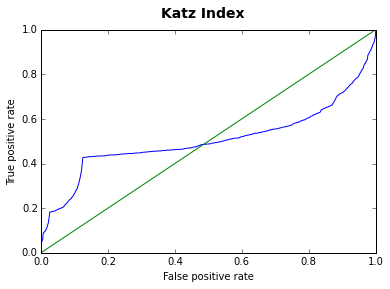

In [10]:
roc = linkprediction.ROCMetric(partitionedGraph[1], dyadScorePairs)
roc.generatePoints()
points = roc.getPoints()
plt.suptitle("Katz Index", fontsize=14, fontweight="bold")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.axis([0, 1, 0, 1])
plt.plot(points[0], points[1])
plt.plot([0, 1], [0, 1])

In [11]:
roc.areaUnderCurve()

0.5044153102595058

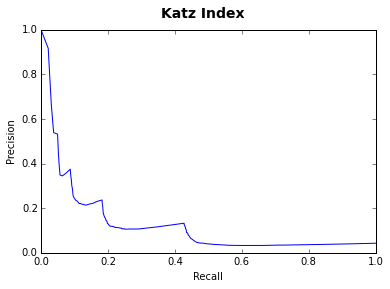

In [12]:
pr = linkprediction.PrecisionRecallMetric(partitionedGraph[1], dyadScorePairs)
pr.generatePoints()
points = pr.getPoints()
plt.suptitle("Katz Index", fontsize=14, fontweight="bold")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.plot(points[0], points[1])

In [13]:
pr.areaUnderCurve()

0.12641875526679594

In [14]:
start_time = time.time()
dyadScorePairs = commonNeighborsIndex.runOnParallel(missingLinks)
print("%s seconds" % (time.time() - start_time))

0.06432294845581055 seconds


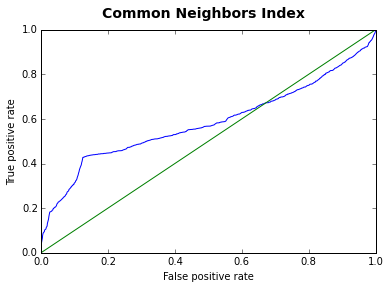

In [15]:
roc = linkprediction.ROCMetric(partitionedGraph[1], dyadScorePairs)
roc.generatePoints()
points = roc.getPoints()
plt.suptitle("Common Neighbors Index", fontsize=14, fontweight="bold")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.axis([0, 1, 0, 1])
plt.plot(points[0], points[1])
plt.plot([0, 1], [0, 1])

In [16]:
roc.areaUnderCurve()

0.5829925904135679

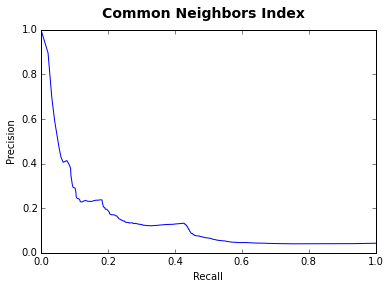

In [17]:
pr = linkprediction.PrecisionRecallMetric(partitionedGraph[1], dyadScorePairs)
pr.generatePoints()
points = pr.getPoints()
plt.suptitle("Common Neighbors Index", fontsize=14, fontweight="bold")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.plot(points[0], points[1])

In [18]:
pr.areaUnderCurve()

0.14135347688545394

In [19]:
start_time = time.time()
dyadScorePairs = jaccardIndex.runOnParallel(missingLinks)
print("%s seconds" % (time.time() - start_time))

0.0421750545501709 seconds


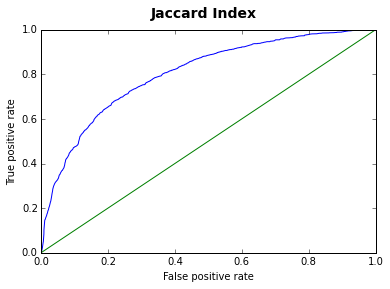

In [20]:
roc = linkprediction.ROCMetric(partitionedGraph[1], dyadScorePairs)
roc.generatePoints()
points = roc.getPoints()
plt.suptitle("Jaccard Index", fontsize=14, fontweight="bold")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.axis([0, 1, 0, 1])
plt.plot(points[0], points[1])
plt.plot([0, 1], [0, 1])

In [21]:
roc.areaUnderCurve()

0.801981621211602

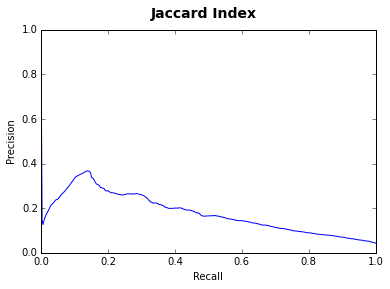

In [22]:
pr = linkprediction.PrecisionRecallMetric(partitionedGraph[1], dyadScorePairs)
pr.generatePoints()
points = pr.getPoints()
plt.suptitle("Jaccard Index", fontsize=14, fontweight="bold")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.plot(points[0], points[1])

In [23]:
pr.areaUnderCurve()

0.17768497921996357

In [24]:
start_time = time.time()
dyadScorePairs = preferentialAttachmentIndex.runOnParallel(missingLinks)
print("%s seconds" % (time.time() - start_time))

0.06311297416687012 seconds


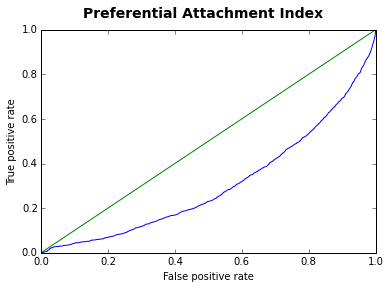

In [25]:
roc = linkprediction.ROCMetric(partitionedGraph[1], dyadScorePairs)
roc.generatePoints()
points = roc.getPoints()
plt.suptitle("Preferential Attachment Index", fontsize=14, fontweight="bold")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.axis([0, 1, 0, 1])
plt.plot(points[0], points[1])
plt.plot([0, 1], [0, 1])

In [26]:
roc.areaUnderCurve()

0.3058731782269786

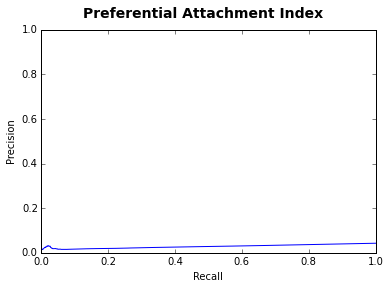

In [27]:
pr = linkprediction.PrecisionRecallMetric(partitionedGraph[1], dyadScorePairs)
pr.generatePoints()
points = pr.getPoints()
plt.suptitle("Preferential Attachment Index", fontsize=14, fontweight="bold")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.plot(points[0], points[1])

In [28]:
pr.areaUnderCurve()

0.028714474918069735

In [29]:
start_time = time.time()
dyadScorePairs = adamicAdarIndex.runOnParallel(missingLinks)
print("%s seconds" % (time.time() - start_time))

0.03688645362854004 seconds


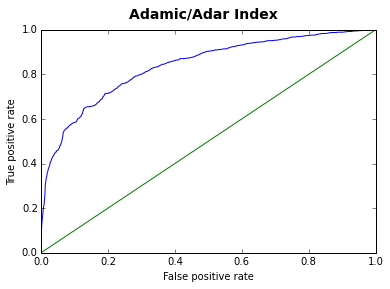

In [30]:
roc = linkprediction.ROCMetric(partitionedGraph[1], dyadScorePairs)
roc.generatePoints()
points = roc.getPoints()
plt.suptitle("Adamic/Adar Index", fontsize=14, fontweight="bold")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.axis([0, 1, 0, 1])
plt.plot(points[0], points[1])
plt.plot([0, 1], [0, 1])

In [31]:
roc.areaUnderCurve()

0.8373126176630367

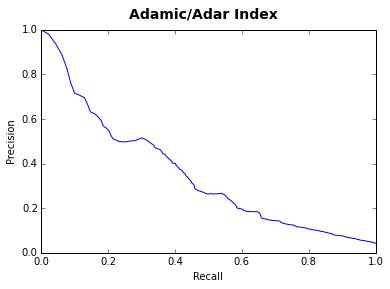

In [32]:
pr = linkprediction.PrecisionRecallMetric(partitionedGraph[1], dyadScorePairs)
pr.generatePoints()
points = pr.getPoints()
plt.suptitle("Adamic/Adar Index", fontsize=14, fontweight="bold")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.plot(points[0], points[1])

In [33]:
pr.areaUnderCurve()

0.35168449928244067

In [77]:
node = partitionedGraph[0].randomNode()
nodes = partitionedGraph[0].neighbors(node)

subGraph = graph.Subgraph().fromNodes(partitionedGraph[0], nodes)

In [78]:
LIST_LENGTH = len(nodes) - 1
a = []
color = {}
while len(a) < LIST_LENGTH:
    a.append(500)
for e in nodes:
    color[e] = len(nodes)
a.append(2000)
len(color)
color[list(color)[-1]] = len(nodes) / 2
color[list(color)[-2]] = len(nodes) / 3

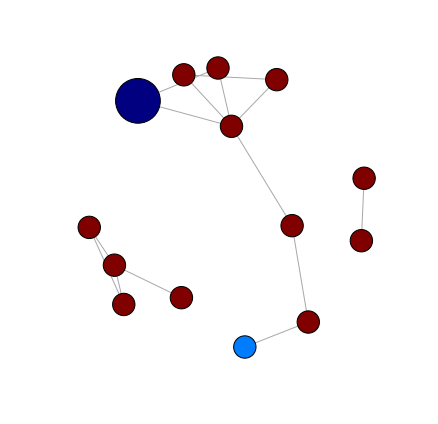

In [79]:
viztasks.drawGraph(subGraph, (7,7), False, a, None, color)

In [ ]:
crossValidator = linkprediction.KFoldCrossValidator(G, commonNeighborsIndex, roc)
crossValidator.crossValidate(10)

Traceback (most recent call last):
  File "/home/xza/Thesis/NetworKit-Esders/env/lib/python3.4/site-packages/IPython/core/interactiveshell.py", line 3032, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/home/xza/Thesis/NetworKit-Esders/env/lib/python3.4/site-packages/IPython/core/interactiveshell.py", line 3032, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-33-a162fb8f0567>", line 2, in <module>
    crossValidator.crossValidate(10)
  File "_NetworKit.pyx", line 5561, in _NetworKit.KFoldCrossValidator.crossValidate (networkit/_NetworKit.cpp:45575)
MemoryError: std::bad_alloc

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/xza/Thesis/NetworKit-Esders/env/lib/python3.4/site-packages/IPython/core/interactiveshell.py", line 1845, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'MemoryError' object has no attribute '_render_traceba

ERROR: Internal Python error in the inspect module.
Below is the traceback from this internal error.

